Loaded model from disk


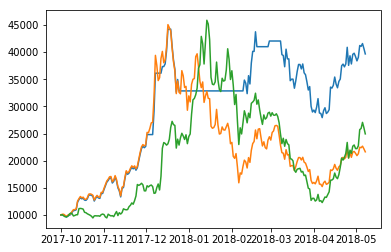

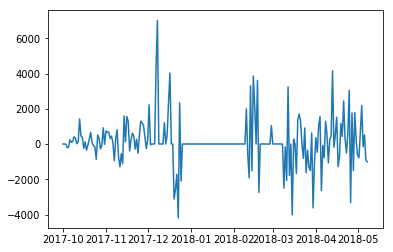

In [2]:
import sys
sys.path.append('../')

import os

import cqt
import cqt.env.mkt_env as env 
import cqt.env.mkt_env_spot as envspot
import cqt.ledger.ledger as ledger
import cqt.strats.strategy as stg
import cqt.strats.strategy_long_short_average as stg_ls
import pandas as pd
import pickle

from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

outDir = '../performance_tracking'
if not os.path.exists(outDir):
    os.makedirs(outDir)
    print(outDir)
    
pickleFileDir = '../data/pickle'
# btcFileName = 'coinapi_ohlcv_GEMINI_SPOT_BTC_USD_1MIN_data.pickle'
# btcFilePath = os.path.join(pickleFileDir, btcFileName)
# file_btc_eth = open(btcFilePath,'rb')

file_btc = '../data/pickle/coinapi_ohlcv_GEMINI_SPOT_BTC_USD_1DAY_data.pickle'
df_btc = pd.read_pickle(file_btc)
file_eth = '../data/pickle/coinapi_ohlcv_GEMINI_SPOT_ETH_USD_1DAY_data.pickle'
df_eth = pd.read_pickle(file_eth)

config = {'asset_type': 'spot'}
comp_btc = envspot.MktEnvSpot('btc', df_btc, config)
comp_eth = envspot.MktEnvSpot('eth', df_eth, config)

model_btc_eth = env.MktEnv([])
model_btc_eth.insert_section(comp_btc)
model_btc_eth.insert_section(comp_eth)
# model_btc_eth = pickle.load(open(os.path.join(pickleFileDir, 'model_btc_eth.pickle'), 'rb'))
# os.listdir('../data/pickle')
# model_btc_eth.


cash = 10000
assets = {'btc': 0, 'eth': 0}
ini_pfo = ledger.Ledger(assets, cash)

comp_btc.target

import copy
start_date_str = '2017-10-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
comp_btc.get_price_close(start_date)

#prices = copy.deepcopy(model_btc_eth.get_section('btc').data)
#prices.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume (BTC)': 'volume'}, inplace=True)
#print(prices)
#close = prices['close'].values
#print(close)
#print(df_btc.index.get_loc(start_date))

import cqt.strats.StrategyTensorFlow as stg_tf
ls_rule = {'method' : 'moving_average', 'window_size' : [3, 5], 'tolerance_up' : 0.03, 'tolerance_down' : 0.03}

#strats_for_training = stg_tf.StrategyTensorFlow(model_btc_eth, ini_pfo, ls_rule)
#strats_for_training.train()

strats = stg_tf.StrategyTensorFlow(model_btc_eth, ini_pfo, ls_rule, '69-model.json', '69-model.h5', 'scaler.pkl')

start_date_str = '2017-10-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
report = strats.back_testing(start_date)
#print(report['pnl'][-1:])
#doubleDipReport = report.copy()

In [ ]:
#print(model_btc_eth.get_section('btc').data.index[6])

In [ ]:
tart_date_str = '2017-10-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
report = strats_for_training.back_testing(start_date)
#print(report['pnl'][-1:])
#doubleDipReport = report.copy()tart_date_str = '2017-10-01'
#start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
#report = strats.back_testing(start_date)
#print(report['pnl'][-1:])
#doubleDipReport = report.copy()

In [ ]:
import numpy as np
signal = pd.Series(index=np.arange(10))
signal.size